In [1]:
import numpy as np
import porepy as pp
import scipy.sparse as sps
import math 
import sys
sys.path.append("../class")
from Flow_class import Flow
from Transport_class import Transport

In [2]:
Nx=20
Ny=20

In [3]:
gb, domain = pp.grid_buckets_2d.single_horizontal([Nx, Ny], x_endpoints=[0.2, 0.8], simplex=False)

In [4]:
parameter={"aperture":1e-3,
          "fracture_perm":1e4,
          "perm":1,
          "f_lambda":lambda x,y,z:math.pi*math.pi*2*math.sin(math.pi*x)*math.sin(math.pi*y),
          "bc_value":[0.0,0.0],
          "bc_type":['dir','dir'],
          "method":"Tpfa"}

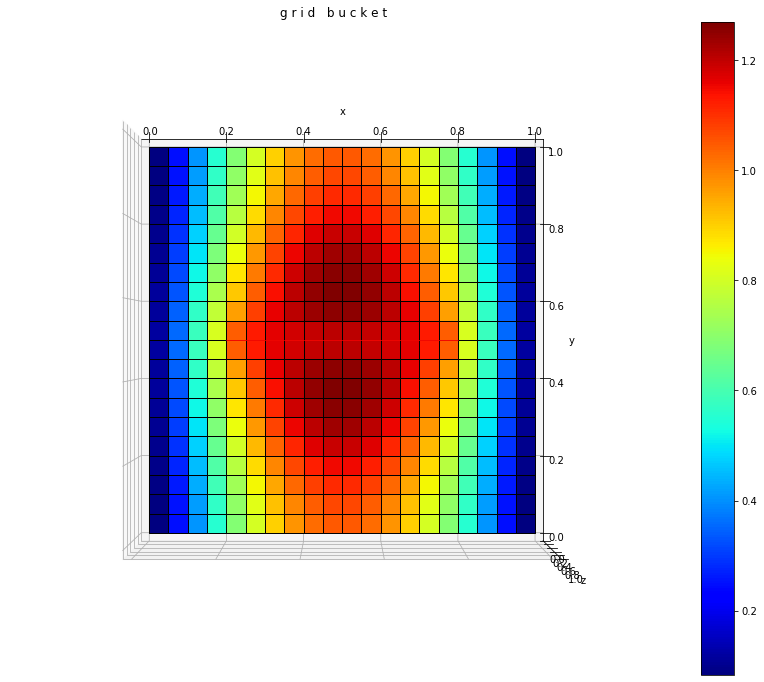

In [5]:
flow=Flow(gb,domain,parameter)
#flow.add_data()
flow.set_data()
flow.discretize()
flow.solve()
flow.plot_pressure()

In [6]:
parameter={
    "aperture":1e-4,
    "por":0.2,
    "por_frac":0.8,
    "time_step":1 / 60,
    "t_max":1 /3,
    "bc_value":[1.0,0.0],
    "bc_type":['dir','dir'],
    "initial_cond":lambda x,y,z:0.0}

transport=Transport(gb,domain,parameter)
transport.set_data()
transport.get_flux()
transport.discretize()
lhs,rhs_source_adv,rhs_mass,assembler=transport.get_transport_lhs_rhs()

A_mass:
  (0, 0)	0.0005000000000000001
  (1, 1)	0.0005000000000000001
  (2, 2)	0.0005000000000000002
  (3, 3)	0.0004999999999999999
  (4, 4)	0.0004999999999999999
  (5, 5)	0.0005000000000000004
  (6, 6)	0.0004999999999999999
  (7, 7)	0.0004999999999999999
  (8, 8)	0.0004999999999999999
  (9, 9)	0.0004999999999999999
  (10, 10)	0.0005000000000000004
  (11, 11)	0.0005000000000000004
  (12, 12)	0.0004999999999999995
  (13, 13)	0.0005000000000000004
  (14, 14)	0.0004999999999999995
  (15, 15)	0.0005000000000000004
  (16, 16)	0.0005000000000000004
  (17, 17)	0.0004999999999999995
  (18, 18)	0.0005000000000000004
  (19, 19)	0.0004999999999999995
  (20, 20)	0.0005000000000000001
  (21, 21)	0.0005000000000000001
  (22, 22)	0.0005000000000000002
  (23, 23)	0.0004999999999999999
  (24, 24)	0.0004999999999999999
  :	:
  (387, 387)	0.0004999999999999993
  (388, 388)	0.0004999999999999993
  (389, 389)	0.0004999999999999993
  (390, 390)	0.0004999999999999998
  (391, 391)	0.0004999999999999998
  (392